In [197]:
import json
from Bio import SeqIO, Phylo, Seq
import pandas as pd
from string import digits
from collections import defaultdict, Counter
import matplotlib.pyplot as plt


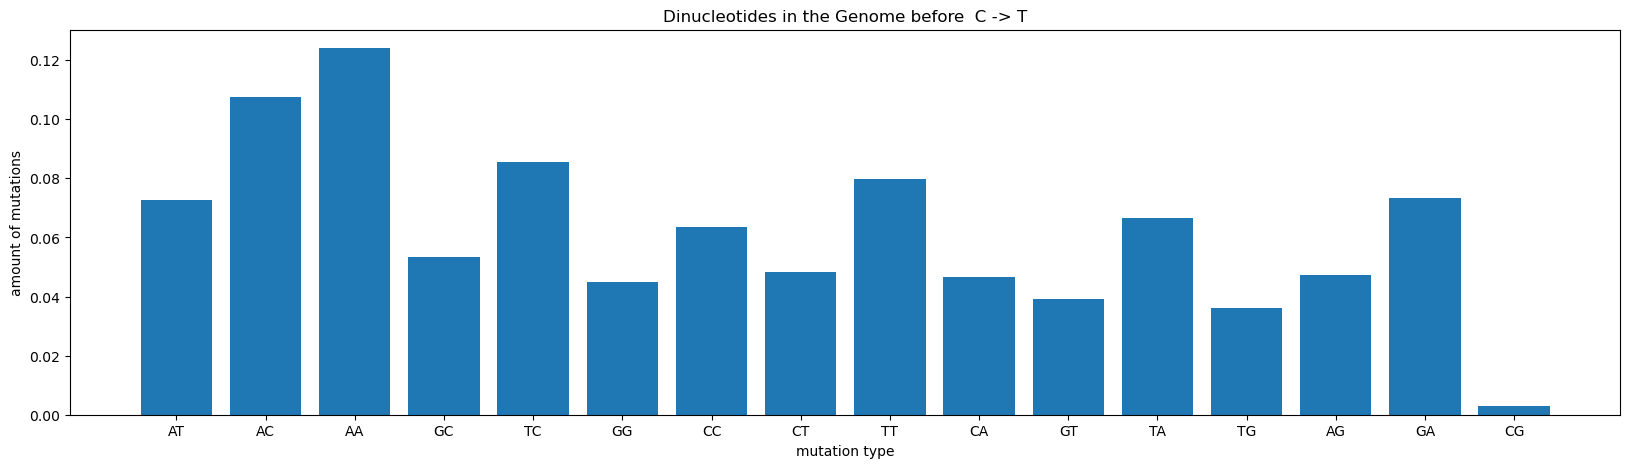

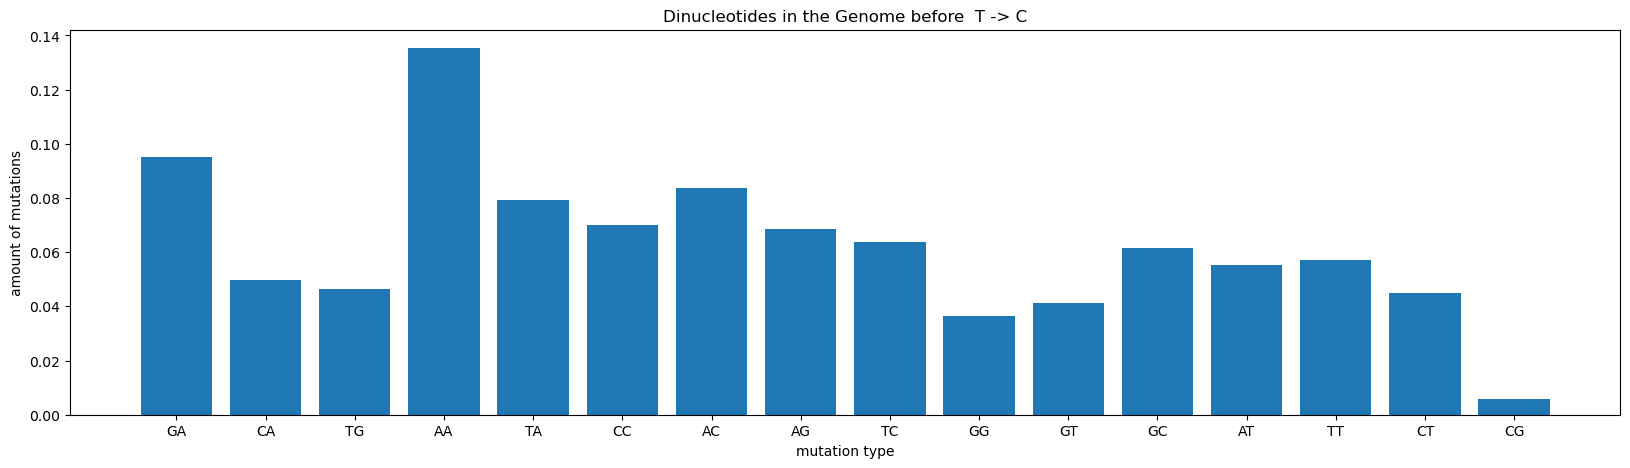

In [198]:
ref = SeqIO.read("data/areference.gbk", "genbank")
def CDS_finder(reference):
    """this function finds CDS location and not CDS location, and saves only those not located at the end of the function"""
    cds_ = dict()
    for feature in reference.features:
        if feature.type == 'CDS': 
            cds_[feature.qualifiers['gene'][0]] = (list(feature.location))

        i#f feature.type == 'source':everything = list(feature.location)

    #not_cds = list(set(everything)-set(cds_))
    #corrected_CDS = [x for x in cds_ if x<=14900]
    #corrected_not_CDS = [x for x in not_cds if x<=14900]
    return(cds_)

gene_cds = CDS_finder(ref)

def mutation_recursive(node, dictionary_=None, new_=None):
    """ this function returns a dictionary with node name as key and a list of mutations along that branch as the info, and excludes deletions and unknowns"""
    gene_cds = CDS_finder(ref)

    if new_ is None:
        new_ = []
    if dictionary_ is None:
        dictionary_ = dict()

    if 'mutations' in node['branch_attrs']:
        aa_mutations = []
        new_ = []
        in_it = []
        if 'nuc' in node['branch_attrs']['mutations']:
            for gene, loc in gene_cds.items():
                if gene in node['branch_attrs']['mutations']:
                    for mut in node['branch_attrs']['mutations'][gene]:
                        aa_mutations.append(int(mut[1:-1])*3+loc[0])
            for mut in node['branch_attrs']['mutations']['nuc']:
                if '-' not in mut and '*' not in mut and 'N' not in mut and "R" not in mut and "Y" not in mut and "M" not in mut and "D" not in mut:
                    if int(mut[1:-1]) not in aa_mutations and int(mut[1:-1])+2 not in aa_mutations and int(mut[1:-1])+1 not in aa_mutations:
                        new_.append(mut)
                    else: in_it.append(mut[1:-1])
             
    if 'name' in node:
            dictionary_[node['name']] = new_

    if 'children' in node:
        for child in node['children']:
           mutation_recursive(child, dictionary_, new_=None)
    return(dictionary_)
           
mut_in_gene = defaultdict(list)
lst_cds, all_muts = ([] for i in range(2))
for gene, cds in gene_cds.items():
    for i in cds:
        lst_cds.append(int(i))
   
mut_by_node_CDS = defaultdict(list)
with open ("data/rsv_a_genome.json") as file_:
    f = json.load(file_)  
    mut_by_node = mutation_recursive(f['tree'])
    for node, muts in mut_by_node.items():
        for m in muts:
            if int(m[1:-1]) in lst_cds:
                mut_by_node_CDS[node].append(m)
                all_muts.append(f'{m[0]}{m[-1]}')
all_mut_freq = Counter(all_muts)

#plt.bar(for_graph.keys(), for_graph.values())
#plt.title("Amount of synonymous mutation types in the RSV-A genome")
#plt.xlabel("mutation type")
#plt.ylabel("amount of mutations")
#gene_cds = CDS_finder(ref)
#for gene, cds in gene_cds.items():
    #for mut in all_muts:
        #if int(mut[1:-1]) in cds:
            #mut_in_gene[gene].append(mut)


#simple annotator for tree

# dinucleotides
all_dinucleotides, all_trinucleotides, all_tetranucleotides = ([] for i in range(3))
aligned_for_tree = SeqIO.parse("data/reconstructed_sequences.fasta", "fasta")
for entry in aligned_for_tree:
    for i in mut_by_node_CDS[entry.id]:
        location_of_interest = int(i[1:-1])
        #print(i)
        #print(entry.seq[location_of_interest-3:location_of_interest-1])
        dinucleotide_and_mut = entry.seq[location_of_interest-3:location_of_interest-1] + f'{i[0]}{i[-1]}'
        all_dinucleotides.append(str(dinucleotide_and_mut))
        trinucleotide_and_mut = entry.seq[location_of_interest-4:location_of_interest-1] + f'{i[0]}{i[-1]}'
        tetranucleotide_and_mut = entry.seq[location_of_interest-5:location_of_interest-1] + f'{i[0]}{i[-1]}'
        all_dinucleotides.append(str(dinucleotide_and_mut))
        all_trinucleotides.append(str(trinucleotide_and_mut))
        all_tetranucleotides.append(str(tetranucleotide_and_mut))
    


gc_list, cg_list, ca_list, ct_list, ga_list, ag_list, tc_list, gt_list, at_list, ac_list, ta_list, tg_list = ([] for i in range(12))
for item_ in all_dinucleotides:
    if "-" not in item_:
        #if item_[2:] == "GC": gc_list.append(item_)
        #if item_[2:] == "CG": cg_list.append(item_)
        #if item_[2:] == "GA": ga_list.append(item_)
        #if item_[2:] == "AG": ag_list.append(item_)
        #if item_[2:] == "CA": ca_list.append(item_)
        if item_[2:] == "CT": ct_list.append(item_)
        if item_[2:] == "TC": tc_list.append(item_)
        #if item_[2:] == "GT": gt_list.append(item_)
        #if item_[2:] == "TG": tg_list.append(item_)
        #if item_[2:] == "AT": at_list.append(item_)
        #if item_[2:] == "TA": ta_list.append(item_)
        #if item_[2:] == "AC": ac_list.append(item_)
        #if item_[2:] == "AG": ag_list.append(item_)

dinucl_counter = Counter(all_dinucleotides)
#gc_counter = Counter(gc_list)
#cg_counter = Counter(cg_list)
#ca_counter = Counter(ca_list)
ct_counter = Counter(ct_list)
#ga_counter = Counter(ga_list)
#ag_counter = Counter(ag_list)
tc_counter = Counter(tc_list)
#gt_counter = Counter(gt_list)
#at_counter = Counter(at_list)
#ac_counter = Counter(ac_list)
#ta_counter = Counter(ta_list)
#tg_counter = Counter(tg_list)
for item_ in all_trinucleotides:
    if "-" not in item_:
        if item_[3:] == "CT": ct_list_tri.append(item_)
        if item_[3:] == "TC": tc_list_tri.append(item_)
for item_ in all_tetranucleotides:
    if "-" not in item_:
        if item_[4:] == "CT": ct_list_tetra.append(item_)
        if item_[4:] == "TC": tc_list_tetra.append(item_)

#counters = [gc_counter, cg_counter, ca_counter, ct_counter,ga_counter, ag_counter, tc_counter, gt_counter, at_counter, ac_counter, ta_counter, tg_counter]
#type_= ["GC", "CG", "CA", "CT", "GA", "AG", "TC", "GT", "AT", "AC", "TA", "TG"]
counters = [ct_counter, tc_counter]
type_ = ["CT", "TC"]
for counter_, typ in zip(counters, type_):
    plt_1 = plt.figure(figsize=(20, 5))
    for mut, freq in all_mut_freq.items():
        if mut == typ:
            values_weighed = [val/freq for val in counter_.values()]
            dinucl = [key[:2] for key in counter_.keys()]
            plt.bar(dinucl, values_weighed)
            plt.title(f"Dinucleotides in the Genome before  {typ[0]} -> {typ[1]}")
            plt.xlabel("mutation type")
            plt.ylabel("amount of mutations")
plt.show()


[0.006460387623257395, 0.022101326079564772, 0.024821489289357363, 0.013600816048962938, 0.0034002040122407345, 0.006460387623257395, 0.0017001020061203672, 0.003740224413464808, 0.0013600816048962938, 0.0023801428085685142, 0.0017001020061203672, 0.006800408024481469, 0.003060183611016661, 0.0017001020061203672]
[0.04146838885112169, 0.01495581237253569, 0.008837525492861998, 0.014276002719238613, 0.003399048266485384, 0.0030591434398368456, 0.006798096532970768, 0.006798096532970768, 0.004758667573079538, 0.01971447994561523, 0.001699524133242692, 0.00645819170632223, 0.001699524133242692, 0.005098572399728076, 0.0037389530931339226, 0.0030591434398368456]


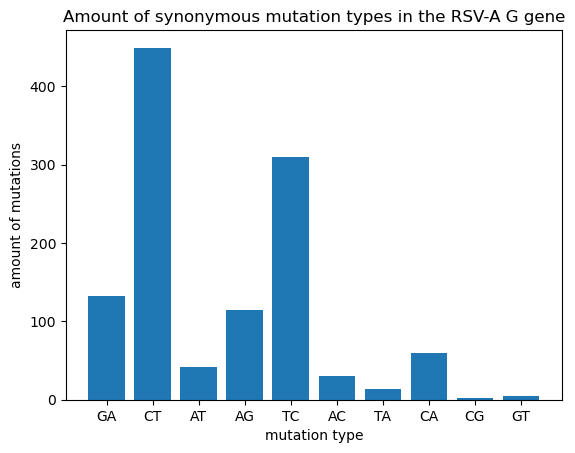

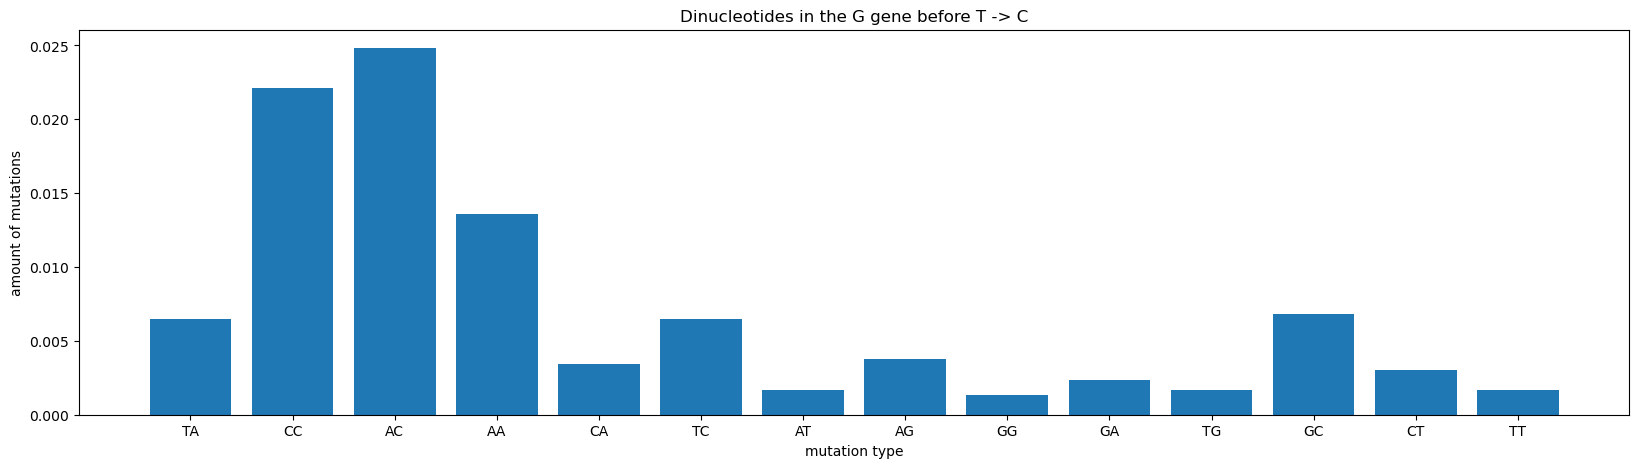

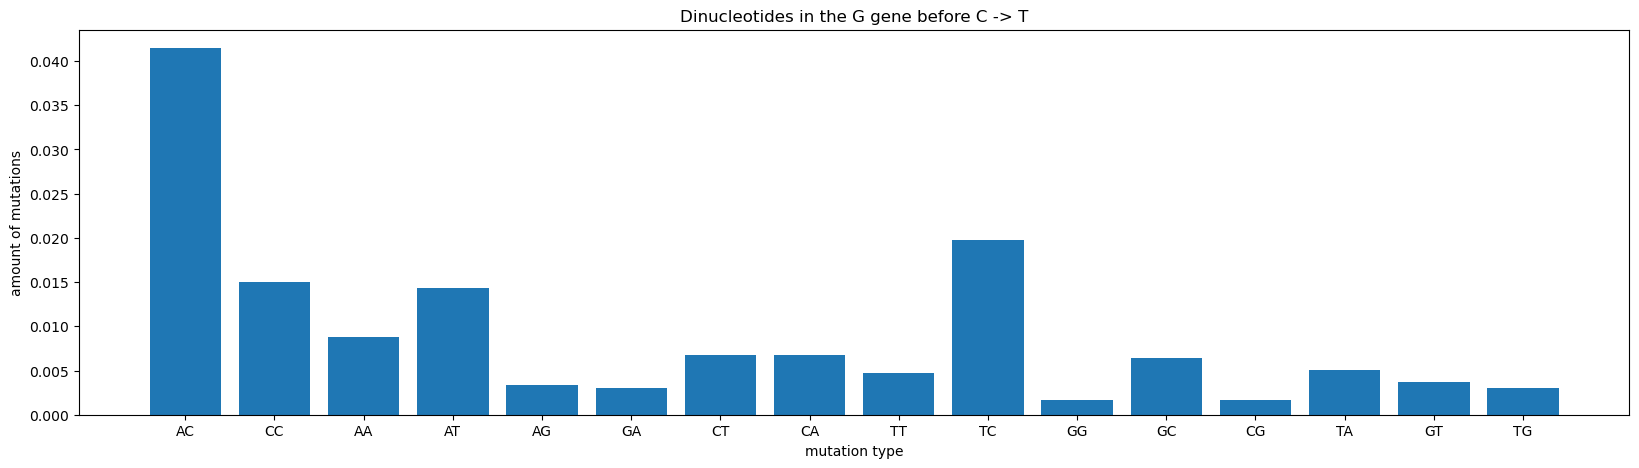

In [210]:
G_muts = []
G_only_muts = defaultdict(list)
#mut_in_gene = defaultdict(list)
with open ("data/rsv_a_genome.json") as file_:
    f = json.load(file_)  
    mut_by_node = mutation_recursive(f['tree'])
    for node, muts in mut_by_node.items():
        for m in muts:
            if int(m[1:-1]) in range(int(gene_cds["G"][0]), int(gene_cds["G"][-1])+1):
                G_muts.append(f'{m[0]}{m[-1]}')
                G_only_muts[node].append(m)
for_graph = Counter(G_muts)
plt.bar(for_graph.keys(), for_graph.values())
plt.title("Amount of synonymous mutation types in the RSV-A G gene")
plt.xlabel("mutation type")
plt.ylabel("amount of mutations")

# dinucleotides
all_dinucleotides, all_trinucleotides, all_tetranucleotides = ([] for i in range(3))
aligned_for_tree = SeqIO.parse("data/reconstructed_sequences.fasta", "fasta")
for entry in aligned_for_tree:
    for i in G_only_muts[entry.id]:
        location_of_interest = int(i[1:-1])
        #print(i)
        #print(entry.seq[location_of_interest-3:location_of_interest-1])
        dinucleotide_and_mut = entry.seq[location_of_interest-3:location_of_interest-1] + f'{i[0]}{i[-1]}'
        trinucleotide_and_mut = entry.seq[location_of_interest-4:location_of_interest-1] + f'{i[0]}{i[-1]}'
        tetranucleotide_and_mut = entry.seq[location_of_interest-5:location_of_interest-1] + f'{i[0]}{i[-1]}'

        all_dinucleotides.append(str(dinucleotide_and_mut))
        all_trinucleotides.append(str(trinucleotide_and_mut))
        all_tetranucleotides.append(str(tetranucleotide_and_mut))


gc_list, cg_list, ca_list, ct_list, ga_list, ag_list, tc_list, gt_list, at_list, ac_list, ta_list, tg_list = ([] for i in range(12))
ct_list_tri, tc_list_tri = ([] for i in range(2))
ct_list_tetra, tc_list_tetra = ([] for i in range(2))
for item_ in all_dinucleotides:
    if "-" not in item_:
        #if item_[2:] == "GC": gc_list.append(item_)
        #if item_[2:] == "CG": cg_list.append(item_)
        #if item_[2:] == "GA": ga_list.append(item_)
        #if item_[2:] == "AG": ag_list.append(item_)
        #if item_[2:] == "CA": ca_list.append(item_)
        if item_[2:] == "CT": ct_list.append(item_)
        if item_[2:] == "TC": tc_list.append(item_)
        #if item_[2:] == "GT": gt_list.append(item_)
        #if item_[2:] == "TG": tg_list.append(item_)
        #if item_[2:] == "AT": at_list.append(item_)
        #if item_[2:] == "TA": ta_list.append(item_)
        #if item_[2:] == "AC": ac_list.append(item_)
        #if item_[2:] == "AG": ag_list.append(item_)
for item_ in all_trinucleotides:
    if "-" not in item_:
        if item_[3:] == "CT": ct_list_tri.append(item_)
        if item_[3:] == "TC": tc_list_tri.append(item_)
for item_ in all_tetranucleotides:
    if "-" not in item_:
        if item_[4:] == "CT": ct_list_tetra.append(item_)
        if item_[4:] == "TC": tc_list_tetra.append(item_)

dinucl_counter = Counter(all_dinucleotides)
trinucl_counter = Counter(all_trinucleotides)
tetranucl_counter = Counter(all_tetranucleotides)
#gc_counter = Counter(gc_list)
#cg_counter = Counter(cg_list)
#ca_counter = Counter(ca_list)
ct_counter = Counter(ct_list)
#ga_counter = Counter(ga_list)
#ag_counter = Counter(ag_list)
tc_counter = Counter(tc_list)
tc_count_tr = Counter(tc_list_tri)
ct_count_tr = Counter(ct_list_tri)

ct_count_te = Counter(ct_list_tetra)
tc_count_te = Counter(tc_list_tetra)
#gt_counter = Counter(gt_list)

#at_counter = Counter(at_list)
#ac_counter = Counter(ac_list)
#ta_counter = Counter(ta_list)
#tg_counter = Counter(tg_list)

#counters = [gc_counter, cg_counter, ca_counter, ct_counter,ga_counter, ag_counter, tc_counter, gt_counter, at_counter, ac_counter, ta_counter, tg_counter]
counters = [tc_counter, ct_counter]
#type_= ["GC", "CG", "CA", "CT", "GA", "AG", "TC", "GT", "AT", "AC", "TA", "TG"]
type_ = ["TC", "CT"]
for counter_, typ in zip(counters, type_):
    plt_1 = plt.figure(figsize=(20, 5))
    for mut, freq in all_mut_freq.items():
        if mut == typ:
            values_weighed = [val/freq for val in counter_.values()]
            print(values_weighed)
            dinucl = [key[:2] for key in counter_.keys()]
            plt.bar(dinucl, values_weighed)
            plt.title(f"Dinucleotides in the G gene before {typ[0]} -> {typ[1]}")
            plt.xlabel("mutation type")
            plt.ylabel("amount of mutations")
plt.show()


TC
ATATC
ACCTC
GCCTC
CACTC
AAATC
CAATC
AACTC
CCATC
ATCTC
TATTC
AAGTC
CTATC
ACATC
CGGTC
AGATC
CTGTC
CGCTC
AGCTC
TGCTC
ACTTC
GAATC
CTCTC
CATTC
TTTTC
TCTTC
GCTTC
CTTTC
AATTC
CCCTC
GGCTC
TGATC
GTCTC
CAGTC
GACTC
TCCTC
AGGTC
CT
CACCT
ACCCT
CAACT
CATCT
AACCT
CAGCT
GGACT
GCTCT
CCACT
GTTCT
CTCCT
AGGCT
CTTCT
GGCCT
ACGCT
ATACT
CGGCT
ATCCT
CCTCT
TCCCT
GCCCT
AGTCT
CTGCT
AAGCT
ACACT
GAACT
AGCCT
AAACT
TACCT
ATTCT
CCCCT
NTACT
GTCCT
GACCT
TCTCT
AATCT
GTGCT
TAGCT
TGCCT
CGCCT
TGTCT
GTACT
TCACT


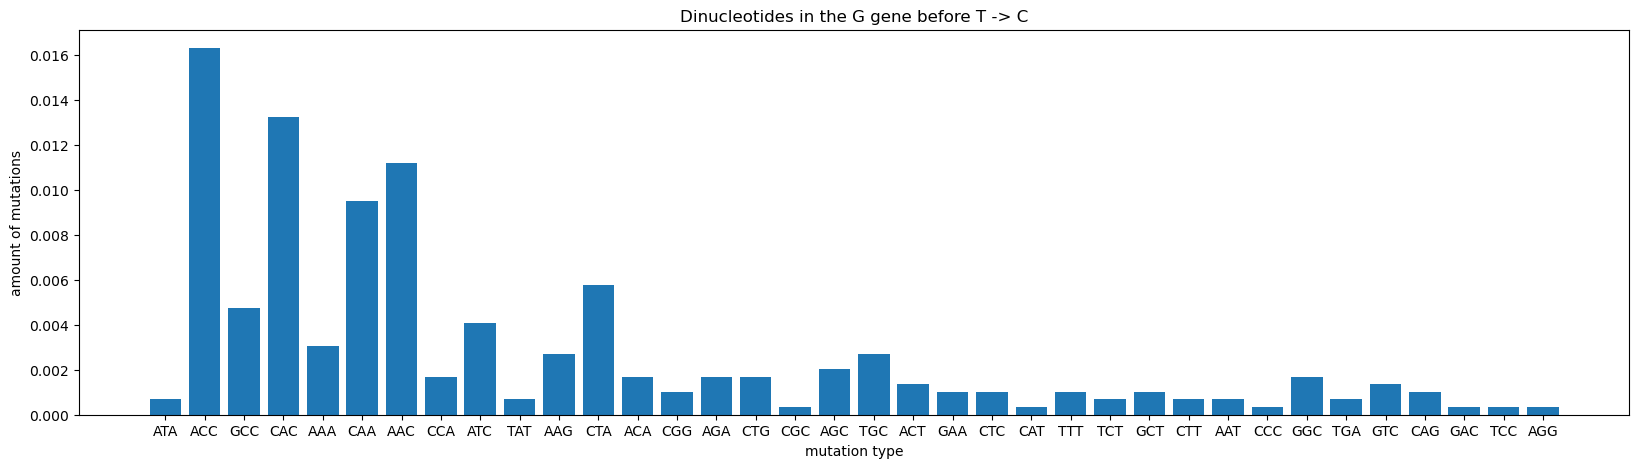

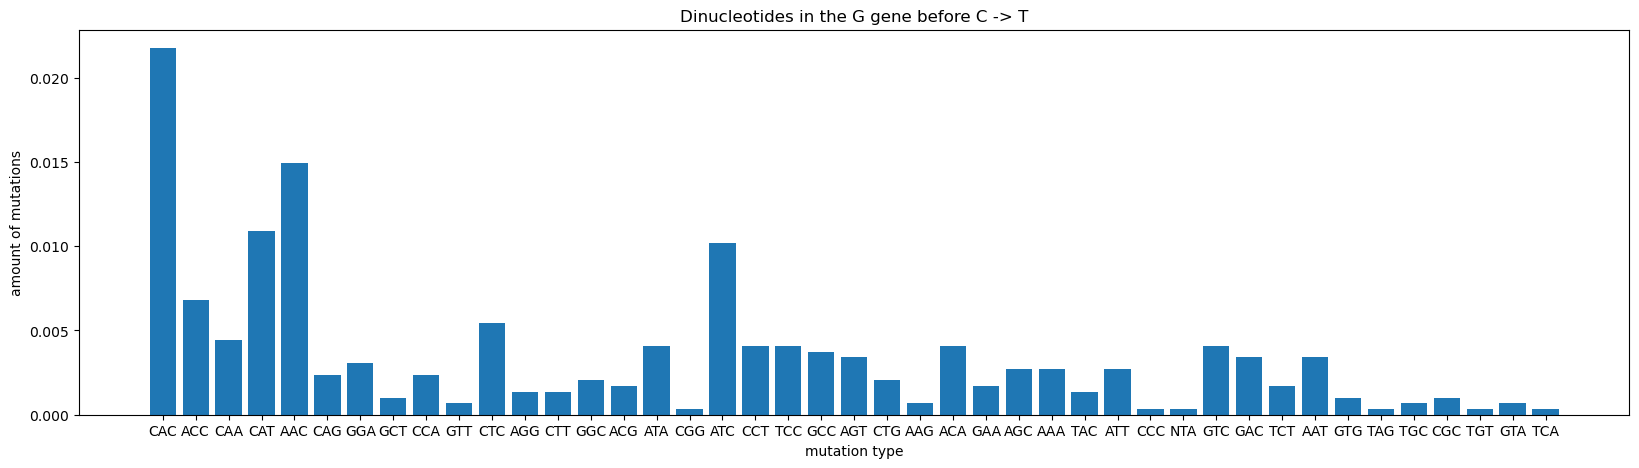

In [200]:
counters = [tc_count_tr, ct_count_tr]
type_ = ["TC", "CT"]
for (i,counter_), typ in zip(enumerate(counters), type_):
    plt_1 = plt.figure(figsize=(20, 5))
    for mut, freq in all_mut_freq.items():
        if mut == typ:
            values_weighed = [val/freq for val in counter_.values()]
            dinucl = [key[:3] for key in counter_.keys()]
            plt.bar(dinucl, values_weighed)
            plt.title(f"Trinucleotides in the G gene before {typ[0]} -> {typ[1]}")
            plt.xlabel("mutation type")
            plt.ylabel("amount of mutations")
plt.show()

AATATC TC
AACCTC TC
AGCCTC TC
CCACTC TC
TACCTC TC
AAAATC TC
TCAATC TC
GAACTC TC
TCCATC TC
TATCTC TC
TCACTC TC
CTATTC TC
CAAGTC TC
TCTATC TC
AATCTC TC
CACATC TC
CCGGTC TC
CACCTC TC
AAGATC TC
CATCTC TC
TCTGTC TC
AAACTC TC
GCGCTC TC
TAGCTC TC
CAACTC TC
GTGCTC TC
CACTTC TC
AGAATC TC
GCTATC TC
TCTCTC TC
ACATTC TC
CCAATC TC
GCAATC TC
ATTTTC TC
ATCTTC TC
ACAATC TC
AGCTTC TC
CAGCTC TC
ACTTTC TC
TAATTC TC
GCCCTC TC
GGGCTC TC
TACTTC TC
ATGATC TC
TGTCTC TC
ACAGTC TC
GGACTC TC
TAACTC TC
ATCCTC TC
CCTCTC TC
TAGATC TC
CAGGTC TC
CCACCT CT
TACCCT CT
GCAACT CT
TCATCT CT
CAACCT CT
TCAGCT CT
GGGACT CT
TGCTCT CT
TCCACT CT
CCATCT CT
ACATCT CT
TGTTCT CT
TCTCCT CT
AAGGCT CT
GCTTCT CT
GGGCCT CT
AACCCT CT
AACGCT CT
CATACT CT
GCGGCT CT
CATCCT CT
ACACCT CT
CCCTCT CT
ATCCCT CT
CCTCCT CT
AGCCCT CT
AAGTCT CT
AAACCT CT
ACCTCT CT
TCTGCT CT
CAAGCT CT
GCACCT CT
AACACT CT
CGAACT CT
CCAACT CT
TAGCCT CT
AGGACT CT
AATACT CT
CAAACT CT
CAGCCT CT
AATCCT CT
TCAACT CT
ATACCT CT
TCACCT CT
CTACCT CT
TACACT CT
TATTCT CT
CCTGCT CT


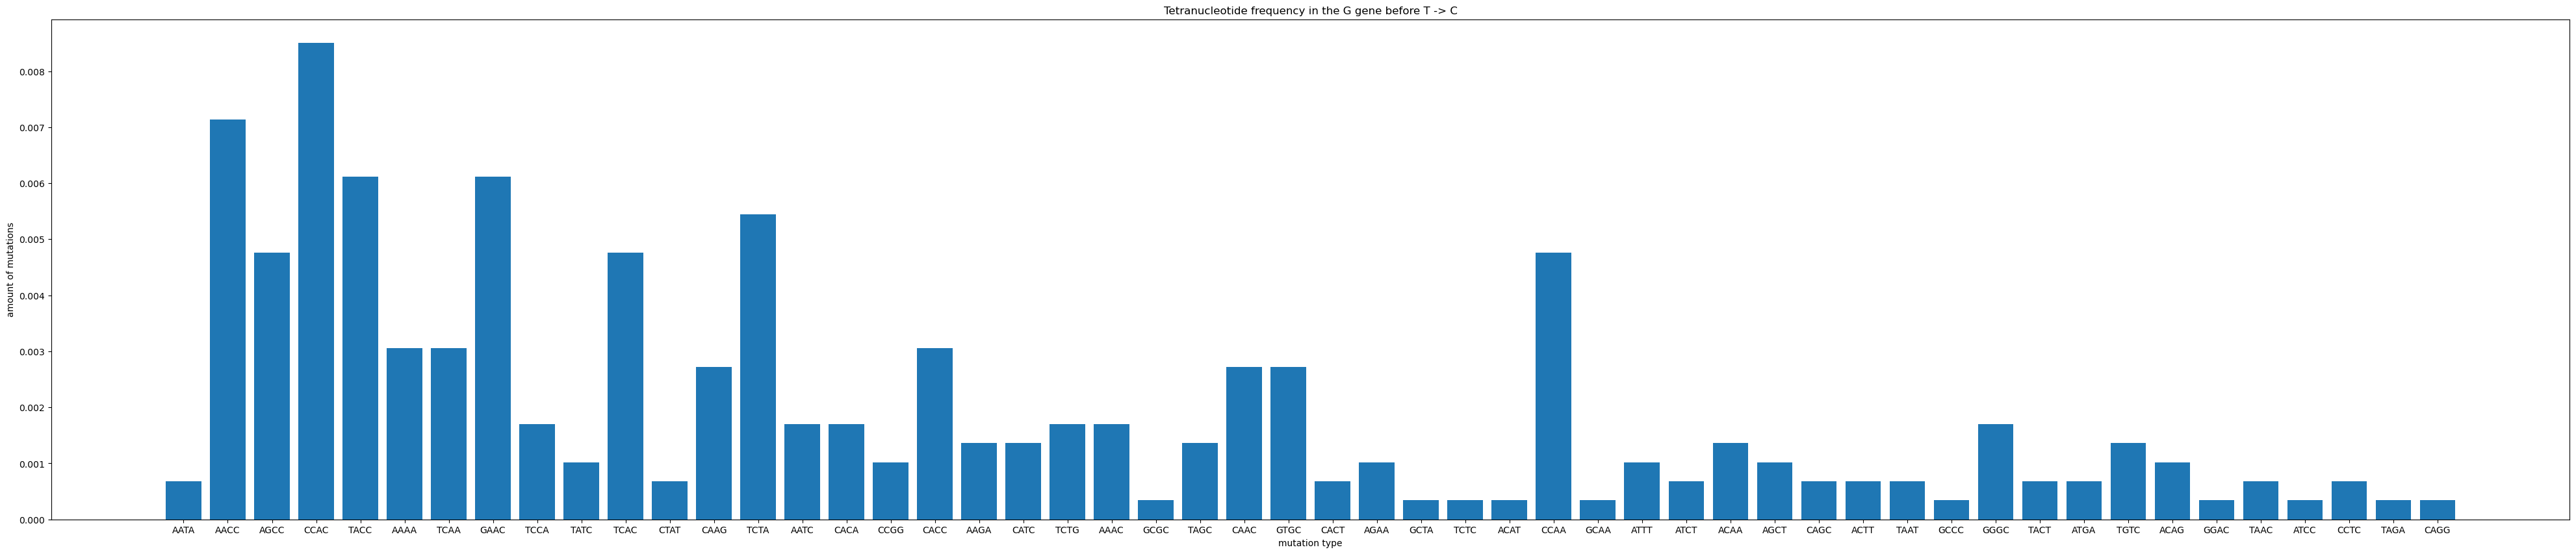

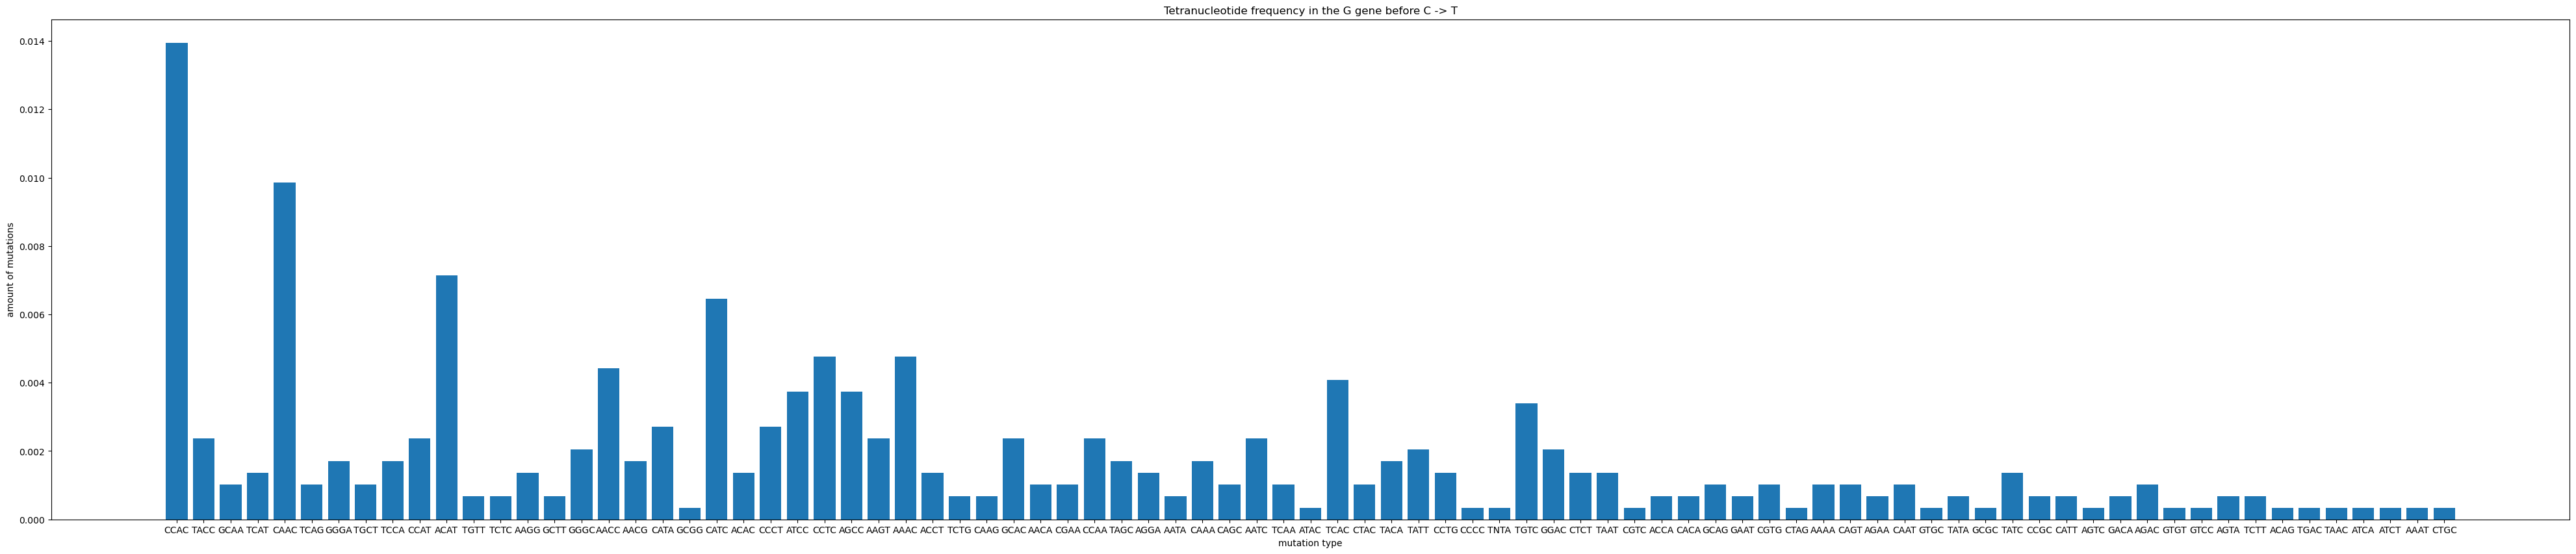

In [207]:
counters = [tc_count_te, ct_count_te]
type_ = ["TC", "CT"]
for counter_, typ in zip(counters, type_):
    plt_1 = plt.figure(figsize=(50, 10))
    for mut, freq in all_mut_freq.items():
        if mut == typ:
            values_weighed = [val/freq for val in counter_.values()]
            dinucl = [key[:4] for key in counter_.keys()]
            plt.bar(dinucl, values_weighed)
            plt.title(f"Tetranucleotide frequency in the G gene before {typ[0]} -> {typ[1]}")
            plt.xlabel("mutation type")
            plt.ylabel("amount of mutations")
plt.show()

start


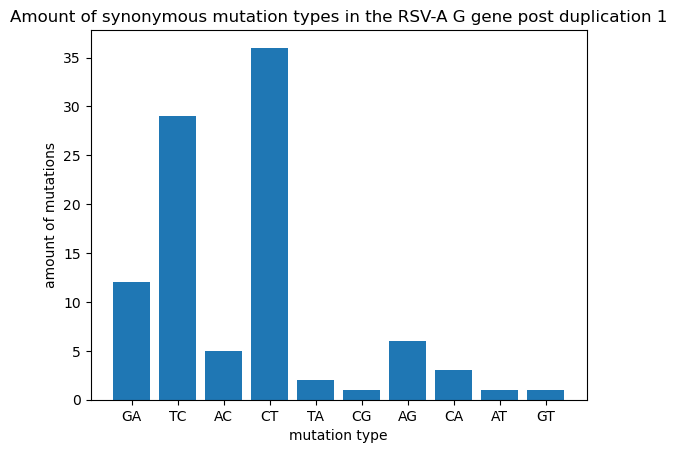

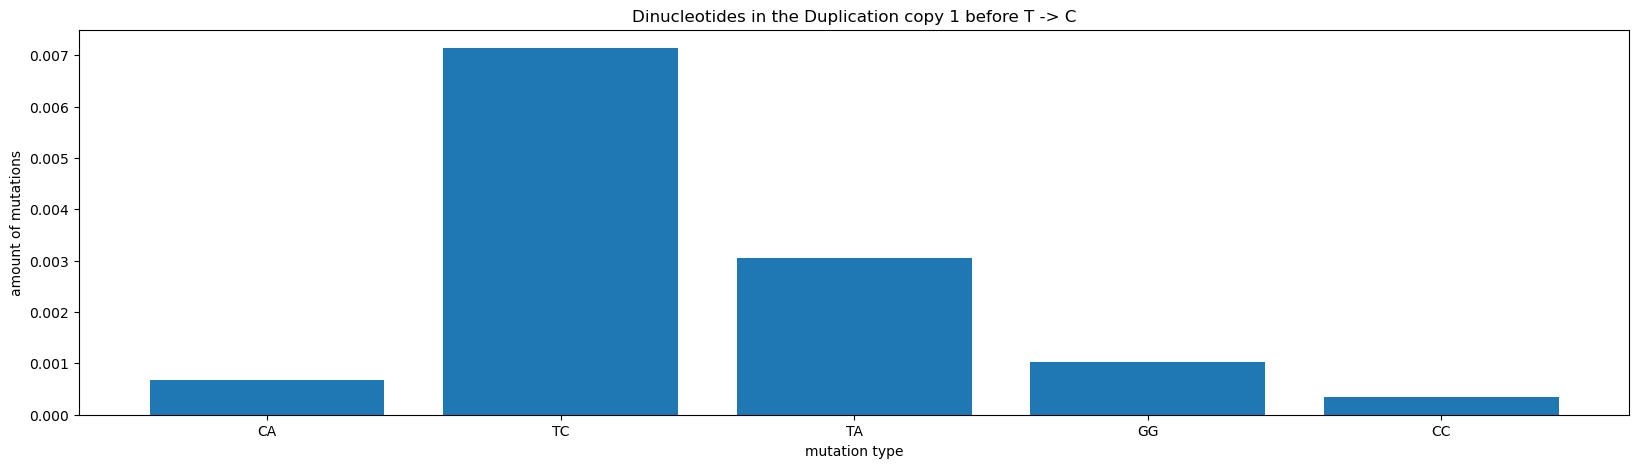

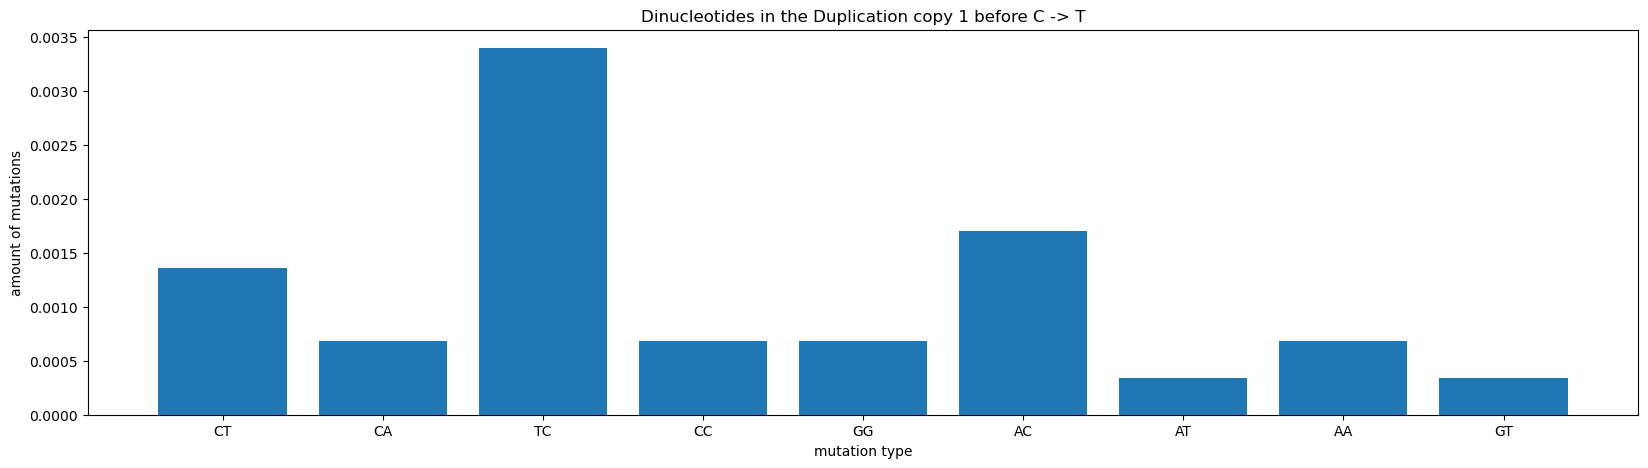

In [208]:

from Bio import SeqIO, Phylo, Seq
from collections import defaultdict, Counter
import matplotlib.pyplot as plt


def separate_duplications(lengthofdupl):
    """
    Divides sequences from duplication file into preduplication, and postduplication copies 1 and 2
    By splitting the files into two parts based on duplication length
    
    inputs: length of duplication (72 for RSV-A and 60 for RSV-B)
            duplication file (fasta file containing aligned duplicated regions)
    outputs:
        - preduplication dictionary 
        - postduplication dictionary (first copy)
        -postduplication dictionary (second copy)
    
    """
    duplicationfile = SeqIO.parse("data/last_reconstruction.fasta", "fasta")
    preduplication, postduplication_1, postduplication_2 = (defaultdict(list) for i in range(3))
    for entry in duplicationfile:
        if '-' not in entry.seq:
            copy_1 = entry.seq[:int(lengthofdupl)][1:-2]
            copy_2 = entry.seq[int(lengthofdupl):][1:-2]
            for i in range(0, len(copy_1), 3):
                postduplication_1[entry.id].append(copy_1[i:i+3])
            for i in range(0, len(copy_2), 3):
                postduplication_2[entry.id].append(copy_2[i:i+3])
        else:
            preduplication_ = entry.seq.replace("-", "")
            if len(preduplication_)== int(lengthofdupl):
                preduplication_ = preduplication_[1:-2]
                for i in range(0, len(preduplication_), 3):
                    preduplication[entry.id].append(preduplication_[i:i+3])
    return(postduplication_1, postduplication_2, preduplication)


def recursive_mutations(treefile, copy):
    """
    Makes basic first reconstruction of common mutations moved to common ancestor. 
    Mutations are split into synonymous and nonsynonymous based on if they result in amino acid change or not. 

    inputs:
        - open newick tree file (rooted at midpoint)
        - copy: dictionary of sequences in a copy of the duplication
    outputs:
        - dictionary synonymous: rudimentary first reconstruction of the common mutations in the copy in dictionary form (synonymous)
        - dictionary nonsynonymous: same as above but nonsynonymous
    """
    synonymous_, nonsynonymous_ = (defaultdict(list) for i in range(2))
    for branch in treefile.get_nonterminals(order='postorder'):
        if branch.name in copy:
            for b in branch:
                if b.name in copy:
                    index = 0
                    for codon_branch, codon_b in zip(copy[branch.name], copy[b.name]):
                        if codon_branch != codon_b:
                            if Seq.translate(codon_branch) == Seq.translate(codon_b):
                                pos = 0
                                for char_branch, char_b in zip(codon_branch, codon_b):
                                    pos +=1
                                    if char_branch != char_b:
                                        entry_unsorted = f'{char_b}{char_branch}{pos+(index*3)}'
                                        synonymous_[b.name].append(str("".join(entry_unsorted[:2])+ entry_unsorted[2:]))
                            else:
                                pos = 0
                                for char_branch, char_b in zip(codon_branch, codon_b):
                                    pos +=1
                                    if char_branch != char_b:
                                        entry_unsorted = f'{char_b}{char_branch}{pos+(index*3)}'
                                        nonsynonymous_[b.name].append(str("".join(entry_unsorted[:2])+ entry_unsorted[2:]))
                        index+=1
    return(nonsynonymous_, synonymous_)

def refine_recursive(treefile, synonymous, nonsynonymous):
    """
    Refines the common mutation function described above. 
    Mutations present in multiple branches are moved further up the tree and exceptions due to sequencing errors are taken into account.

    inputs:
        dictionary synonymous (dictionary of branches and synonymous mutations)
        dictionary nonsynonymous (same as above but nonsynonymous)
        read nwk tree file rooted at midpoint, with the relevant branches

    outputs:
        dictionaries for synonymous and nonsynonymous common mutations.
    
    """
    for branch in treefile.get_nonterminals(order='postorder'):
        if branch.name in synonymous:
            for b in branch:
                if b.name in synonymous:
                    synonymous[b.name] = list(set(synonymous[b.name]).difference(set(synonymous[branch.name])))
        if branch.name in nonsynonymous:
            for b in branch:
                if b.name in synonymous:
                    nonsynonymous[b.name] = list(set(nonsynonymous[b.name]).difference(set(nonsynonymous[branch.name])))
    for branch in treefile.get_nonterminals(order='preorder'):
        sort_branch = []
        for e in nonsynonymous[branch.name]:
            sort_branch.append(str("".join(sorted(e[:2]+ e[2:]))))
        for b in branch:
            if b.name in nonsynonymous:
                sort_b = []
                for entry in nonsynonymous[b.name]:
                    sort_b.append(str("".join((entry[:2]+ entry[2:]))))
                nonsynonymous[b.name] = set(set(sort_b).difference(set(sort_branch)))
    return(nonsynonymous, synonymous)


def mutations(synonymous, nonsynonymous):
    """
    Returns locations of synonymous and nonsynonymous mutations in list format
    
    Inputs:
        synonymous mutation dictionary
        nonsynonymous mutation dictionary
    Outputs:
        - list of nonsynonymous mut location
        - list of synonymous mut location
    """
    syn_, nonsyn_, lst_s, lst_n = ([] for i in range(4))
    for i in synonymous.values():
        ls = list(i)
        for j in ls: lst_s.append(j)
    for item_ in lst_s: syn_.append(int(item_[2:]))
    for i in nonsynonymous.values():
        ls = list(i)
        numbers_ = []
        for it in ls:numbers_.append(it[2:])
        new_numbers_ = list(set(numbers_))
        for j in new_numbers_: lst_n.append(j)
    for item_ in lst_n: nonsyn_.append(int(item_))
    
    return(nonsyn_, syn_)

duplication_file = SeqIO.parse("data/last_reconstruction.fasta", 'fasta')
synonymous_one, nonsynonymous_one  = (defaultdict(list) for i in range(2))
tree_file  = Phylo.read("data/duplication/a_dupl_tree.nwk", "newick")
tree_file.root_at_midpoint()
tree_file.find_clades()


total_len = tree_file.total_branch_length()
seq_dict = dict()
for record in duplication_file:
    seq_dict[record.id] = record.seq
for branch in tree_file.get_nonterminals(order='preorder'):
    if pd.isna(branch.name) == False:
        if '-'*int(72) not in seq_dict[branch.name]:
            with_dupl = branch.total_branch_length()
            break
without_dupl = total_len-with_dupl

copy1, copy2, preduplication = separate_duplications(72)
nonsynonymous_1, synonymous_1 = recursive_mutations(tree_file, copy1)
nonsynonymous_2, synonymous_2 = recursive_mutations(tree_file, copy2)
nonsynonymous_pre, synonymous_pre = recursive_mutations(tree_file, preduplication)
nonsynonymous_1_refined, synonymous_1_refined = refine_recursive(tree_file, nonsynonymous_1, synonymous_1)
nonsynonymous_2_refined, synonymous_2_refined = refine_recursive(tree_file, nonsynonymous_2, synonymous_2)
nonsynonymous_pre_refined, synonymous_pre_refined = refine_recursive(tree_file, nonsynonymous_pre, synonymous_pre)
nonsyn_1, syn_1 = mutations(synonymous_1_refined, nonsynonymous_1_refined)
nonsyn_2, syn_2 = mutations(synonymous_2_refined, nonsynonymous_2_refined)
nonsyn_pre, syn_pre = mutations(synonymous_pre_refined, nonsynonymous_pre_refined)

syn_1_muts = []
for node, muts in synonymous_1_refined.items():
    for m in muts:
        if len(m) == 4:
            syn_1_muts.append(f'{m[:-2]}')
        else:
            syn_1_muts.append(f'{m[:-1]}')
for_graph = Counter(syn_1_muts)
plt.bar(for_graph.keys(), for_graph.values())
plt.title("Amount of synonymous mutation types in the RSV-A G gene post duplication 1")
plt.xlabel("mutation type")
plt.ylabel("amount of mutations")

# dinucleotides

##finish in 15 min
all_dinucleotides = []
print('start')
duplication_file = SeqIO.parse("data/last_reconstruction.fasta", 'fasta')
for entry in duplication_file:
    #print(entry)
    for i in synonymous_1_refined[entry.id]:
        location = int(i[2:])
        #print(i)
        #print(entry.seq[location-2: location+1])
        location_of_interest = int(i[2:])
        #print(entry.seq[location-3: location-1])
        #print((entry.seq[location-2: location+1]))
        dinucleotide_and_mut = entry.seq[location-2: location] + f'{i[1]}{i[0]}'
        #print(dinucleotide_and_mut)
        all_dinucleotides.append(str(dinucleotide_and_mut))


gc_list, cg_list, ca_list, ct_list, ga_list, ag_list, tc_list, gt_list, at_list, ac_list, ta_list, tg_list = ([] for i in range(12))
for item_ in all_dinucleotides:
    if "-" not in item_:
        #if item_[2:] == "GC": gc_list.append(item_)
        #if item_[2:] == "CG": cg_list.append(item_)
        #if item_[2:] == "GA": ga_list.append(item_)
        #if item_[2:] == "AG": ag_list.append(item_)
        #if item_[2:] == "CA": ca_list.append(item_)
        if item_[2:] == "CT": ct_list.append(item_)
        if item_[2:] == "TC": tc_list.append(item_)
        #if item_[2:] == "GT": gt_list.append(item_)
        #if item_[2:] == "TG": tg_list.append(item_)
        #if item_[2:] == "AT": at_list.append(item_)
        #if item_[2:] == "TA": ta_list.append(item_)
        #if item_[2:] == "AC": ac_list.append(item_)
        #if item_[2:] == "AG": ag_list.append(item_)

dinucl_counter = Counter(all_dinucleotides)
#gc_counter = Counter(gc_list)
#cg_counter = Counter(cg_list)
#ca_counter = Counter(ca_list)
ct_counter = Counter(ct_list)
#ga_counter = Counter(ga_list)
#ag_counter = Counter(ag_list)
tc_counter = Counter(tc_list)
#gt_counter = Counter(gt_list)
#at_counter = Counter(at_list)
#ac_counter = Counter(ac_list)
#ta_counter = Counter(ta_list)
#tg_counter = Counter(tg_list)

#counters = [gc_counter, cg_counter, ca_counter, ct_counter,ga_counter, ag_counter, tc_counter, gt_counter, at_counter, ac_counter, ta_counter, tg_counter]
#type_= ["GC", "CG", "CA", "CT", "GA", "AG", "TC", "GT", "AT", "AC", "TA", "TG"]
counters = [tc_counter, ct_counter]
type_ = ["TC", "CT"]
for (i,counter_), typ in zip(enumerate(counters), type_):
    plt_1 = plt.figure(figsize=(20, 5))
    for mut, freq in all_mut_freq.items():
        if mut == typ:
            values_weighed = [val/freq for val in counter_.values()]
            dinucl = [key[:2] for key in counter_.keys()]
            plt.bar(dinucl, values_weighed)
            plt.title(f"Dinucleotides in the Duplication copy 1 before {typ[0]} -> {typ[1]}")
            plt.xlabel("mutation type")
            plt.ylabel("amount of mutations")
plt.show()

Text(0, 0.5, 'amount of mutations')

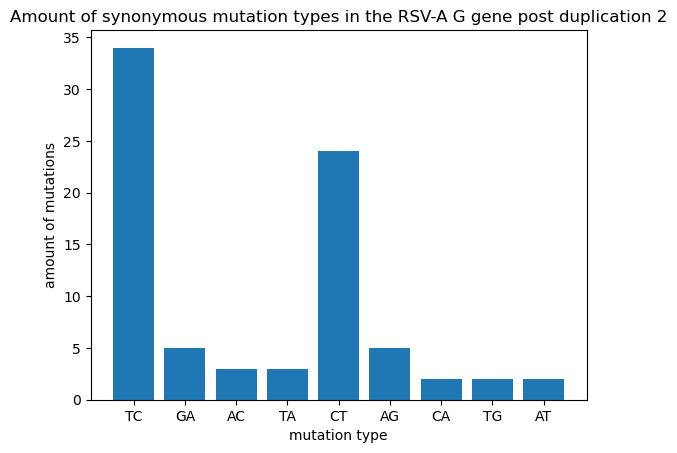

In [117]:
syn_2_muts = []
for node, muts in synonymous_2_refined.items():
    for m in muts:
        if len(m) == 4:
            syn_2_muts.append(f'{m[:-2]}')
        else:
            syn_2_muts.append(f'{m[:-1]}')
for_graph = Counter(syn_2_muts)
plt.bar(for_graph.keys(), for_graph.values())
plt.title("Amount of synonymous mutation types in the RSV-A G gene post duplication 2")
plt.xlabel("mutation type")
plt.ylabel("amount of mutations")

Text(0, 0.5, 'amount of mutations')

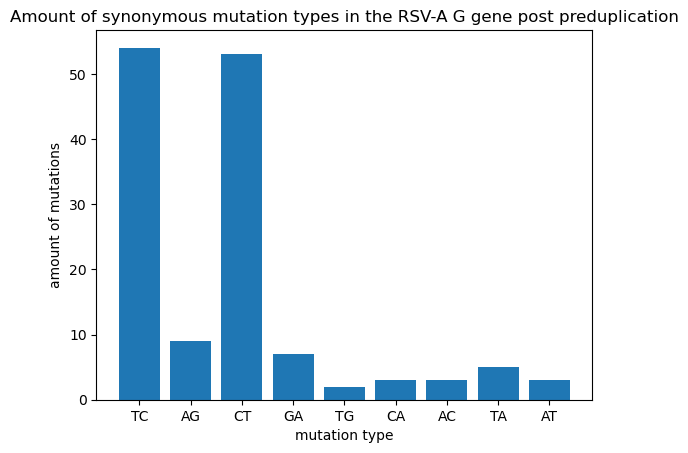

In [118]:
syn_pre_muts = []
for node, muts in synonymous_pre_refined.items():
    for m in muts:
        if 'N' not in m:
            if len(m) == 4:
                syn_pre_muts.append(f'{m[:-2]}')
            else:
                syn_pre_muts.append(f'{m[:-1]}')
for_graph = Counter(syn_pre_muts)
plt.bar(for_graph.keys(), for_graph.values())
plt.title("Amount of synonymous mutation types in the RSV-A G gene post preduplication")
plt.xlabel("mutation type")
plt.ylabel("amount of mutations")